<a href="https://colab.research.google.com/github/Ruqyai/ML_4_BEGINNER/blob/master/houses_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Learning Objectives:

 
* End-to-End Machine Learning Project
* Get the Data
* Take a Quick Look at the Data Structure
* Discover and Visualize the Data to Gain Insights
* Looking for Correlations
* Prepare the Data for Machine Learning Algorithms
* Select and Train a Model
* Training and Evaluating the Model
* Fine-Tune Your Model


#Houses prices(**Regression**)



###Import libraries




In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Load the dataset

In [2]:
!wget https://raw.githubusercontent.com/gdg-ml-team/ioExtended/master/kc_house_data.csv

--2020-06-22 03:20:59--  https://raw.githubusercontent.com/gdg-ml-team/ioExtended/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.1s    

2020-06-22 03:21:00 (17.5 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



In [3]:
df = pd.read_csv('kc_house_data.csv')

##Data Exploration

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

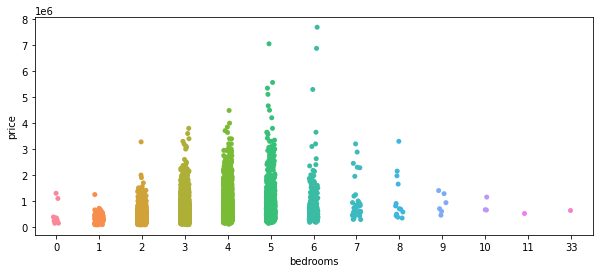

In [7]:

plt.figure(figsize=(10, 4))
sb.stripplot(x="bedrooms", y="price", data=df);

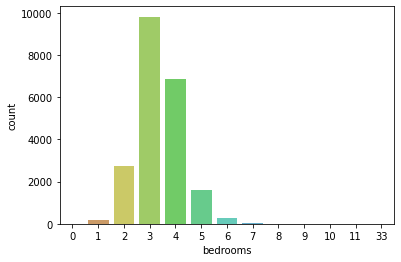

In [8]:
sb.countplot(x='bedrooms',data=df, palette='hls')

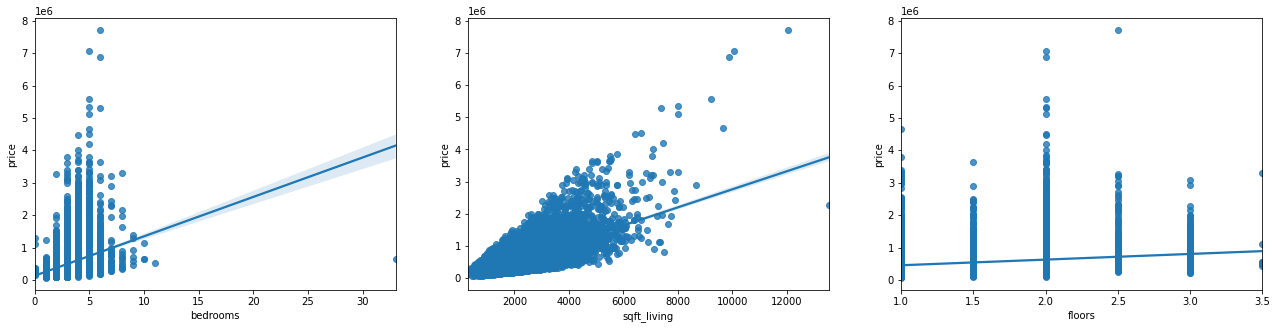

In [9]:
plt.figure(figsize=(22,5))

plt.subplot(131)#subplot to add a subplot to the current figure
sb.regplot(x='bedrooms', y='price', data=df) 

plt.subplot(132)
sb.regplot(x='sqft_living', y='price', data=df)
                    
plt.subplot(133)
sb.regplot(x='floors', y='price', data=df)
          
plt.show()  #Display a figure
          

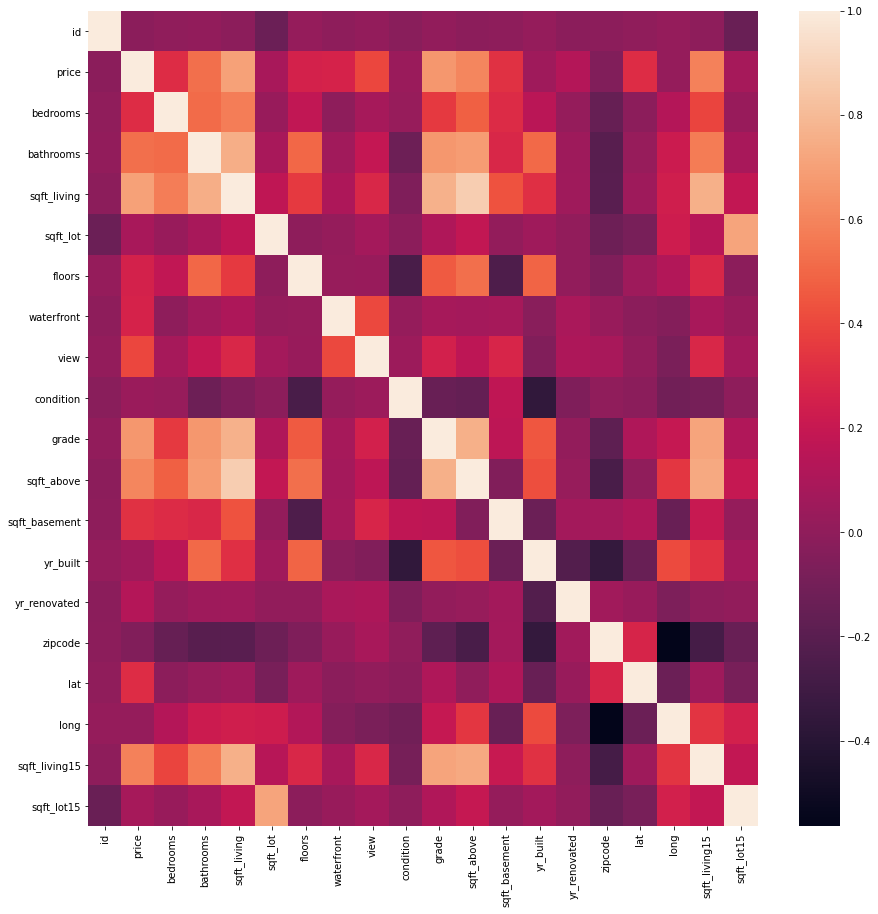

In [10]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr())

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
print('max price : ', df['price'].max())
print('min price : ', df['price'].min())
print('mean price :',df['price'].mean())

max price :  7700000.0
min price :  75000.0
mean price : 540088.1417665294


##Select features

In [13]:
df = df.drop(['id','date', 'lat', 'long','zipcode'], axis =1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503




##Choose the algorithm that you think it is the right



1. **Input data**

In [14]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'sqft_living15', 'sqft_lot15']
labels = df['price'].values
features = df[list(columns)].values

2. **Spilt data**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15129, 15) (6484, 15) (15129,) (6484,)



   3. **Bulid a Model**


In [16]:
from sklearn import linear_model

# Bulid a new Model
regression = linear_model.LinearRegression()

# Train the Model
regression.fit(X_train, y_train)

# Evaluatet
Accuracy = regression.score(X_train, y_train)
print ("Accuracy of the training : ", Accuracy*100)

accuracy = regression.score(X_test, y_test)
print ("Accuracy of the testing : ", accuracy*100)



Accuracy of the training :  64.52521991743112
Accuracy of the testing :  67.31513968835078


In [17]:
# Predict
predict = regression.predict(X_test)
print ("Predicted price :", predict[7])
print ("Real price :", y_test[7])

Predicted price : 337107.05167095177
Real price : 345000.0


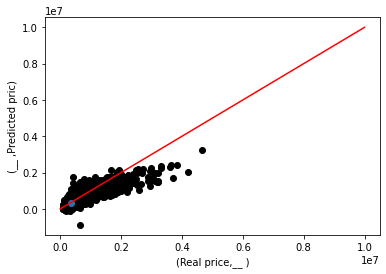

In [18]:
# visualization
plt.scatter(y_test, predict,  color='black')
plt.scatter(y_test[7], predict[7])
plt.xlabel('(Real price,__ )')
plt.ylabel('(__ ,Predicted pric)')
plt.plot([0, 10000000], [0, 10000000], color='red')

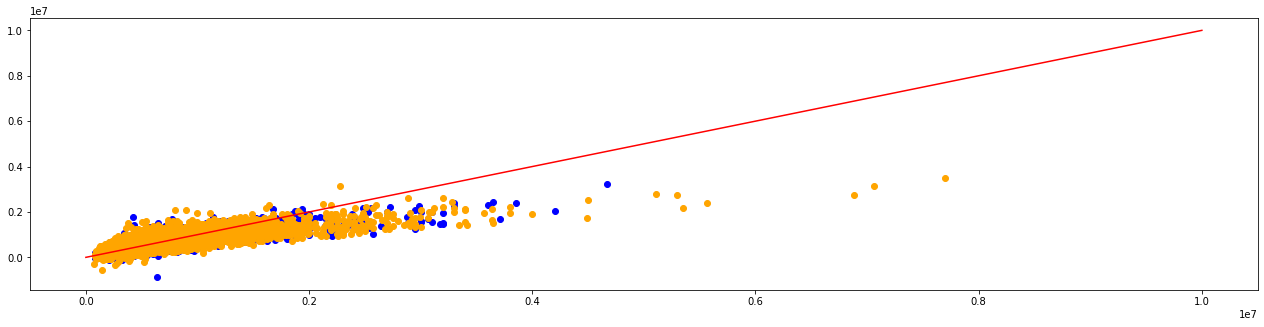

In [19]:
predict_test = regression.predict(X_test)
predict_train = regression.predict(X_train)
plt.figure(figsize=(22,5))
plt.scatter(y_test, predict_test,  color='blue')
plt.scatter(y_train, predict_train,  color='Orange')
plt.plot([0, 10000000], [0, 10000000], color='red')
plt.show() 


##Fine-Tune Your Model

In [20]:
#Fine-Tune Your Model
df_Fine_Tune = pd.read_csv('kc_house_data.csv')

df_Fine_Tune = df_Fine_Tune.drop([ 'date','sqft_lot', 'waterfront', 'yr_built', 'condition','id'], axis =1)

labels_Fine_Tune = df_Fine_Tune['price'].values
features_Fine_Tune = df_Fine_Tune.drop(['price'], axis =1).values

X_train_Fine_Tune, X_test_Fine_Tune, y_train_Fine_Tune, y_test_Fine_Tune = train_test_split(features_Fine_Tune, labels_Fine_Tune, test_size=0.30)

print(X_train_Fine_Tune.shape, X_test_Fine_Tune.shape, y_train_Fine_Tune.shape, y_test_Fine_Tune.shape)

(15129, 14) (6484, 14) (15129,) (6484,)


In [21]:
# Bulid a new Model
regression_Fine_Tune = linear_model.LinearRegression()

# Train the Model
regression_Fine_Tune.fit(X_train_Fine_Tune, y_train_Fine_Tune)

# Evaluatet
Accuracy_Fine_Tune = regression_Fine_Tune.score(X_train_Fine_Tune, y_train_Fine_Tune)
print ("Accuracy of the training : ", Accuracy_Fine_Tune*100)

accuracy_Fine_Tune = regression_Fine_Tune.score(X_test_Fine_Tune, y_test_Fine_Tune)
print ("Accuracy of the testing : ", accuracy_Fine_Tune*100)

Accuracy of the training :  65.49418174643799
Accuracy of the testing :  66.43344349586722
